In [92]:
!pip install sanic

You should consider upgrading via the '/Users/shadow/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [26]:
from matplotlib import pyplot as plt
import cv2
import paddlehub as hub
import numpy as np 

# 模型加载
# use_gpu：是否使用GPU进行预测
model = hub.Module(name='MiDaS_Small', use_gpu=False)

In [ ]:
# 模型预测
def predict(images):
    return model.depth_estimation(images=images)

In [22]:
def get_depth_map(depth, bits=1):
    depth_min = depth.min()
    depth_max = depth.max()

    max_val = (2**(8 * bits)) - 1

    if depth_max - depth_min > np.finfo("float").eps:
        out = max_val * (depth - depth_min) / (depth_max - depth_min)
    else:
        out = np.zeros(depth.shape, dtype=depth.type)
    if bits == 1:
        return out.astype("uint8")
    elif bits == 2:
        return out.astype("uint16")

In [29]:
def show(_im):
    plt.figure(figsize=(4,4))
    _img = _im[:,:,::-1] # 必须为 ::-1
    plt.imshow(_img)

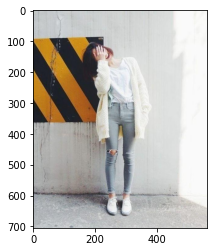

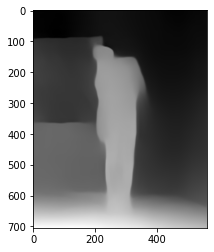

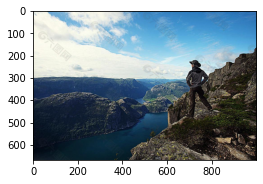

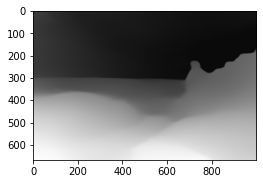

In [5]:
for fp in ['test/test.jpeg','test/t2.jpeg']:
    im=cv2.imread(fp)
    show(im)
    img=predict([im])[0]
    img=get_depth_map(img)
    img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
#     cv2.imwrite('depth_estimation.png',img)
    show(img)

In [6]:
human_seg = hub.Module(name='humanseg_server')
import base64
def cv2_to_base64(image):
    data = cv2.imencode('.jpg', image)[1]
    return base64.b64encode(data.tostring()).decode('utf8')
def base64_to_cv2(b64str):
    data = base64.b64decode(b64str.encode('utf8'))
    data = np.fromstring(data, np.uint8)
    data = cv2.imdecode(data, cv2.IMREAD_COLOR)
    return data

[2021-03-11 15:30:15,635] [ WARNING] - The _initialize method in HubModule will soon be deprecated, you can use the __init__() to handle the initialization of the object


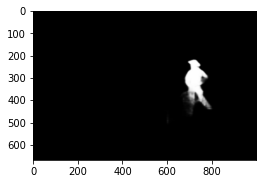

In [7]:
im = cv2.imread('test/t2.jpeg')
#visualization=True可以用于查看超分图片效果，可设置为False提升运行速度。
res = human_seg.segment(images=[im],visualization=False)
img = cv2.cvtColor(res[0]['data'],cv2.COLOR_GRAY2RGB)
show(img)

In [31]:
res[0]['data']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

True

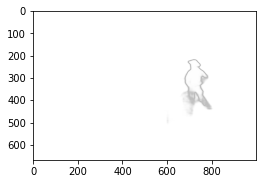

In [36]:
b_channel, g_channel, r_channel = cv2.split(img) 

# alpha_channel = np.ones(b_channel.shape, dtype=b_channel.dtype) * 1 #creating a dummy alpha channel image. 

img_BGRA = cv2.merge((b_channel, g_channel, r_channel, res[0]['data'])) 
show(img_BGRA)
cv2.imwrite('h.png',img_BGRA)

In [37]:
cv2_to_base64(img)

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAVKA+gDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD+f+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigA

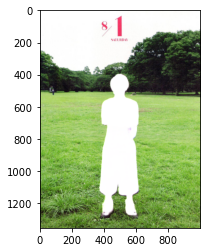

In [29]:
show(res)

In [4]:
!python main.py

/Users/shadow/opt/anaconda3/lib/python3.7/site-packages/pip/_vendor/packaging/version.py:130: DeprecationWarning: Creating a LegacyVersion has been deprecated and will be removed in the next major release
  DeprecationWarning,
/Users/shadow/opt/anaconda3/lib/python3.7/site-packages/pip/_vendor/packaging/version.py:130: DeprecationWarning: Creating a LegacyVersion has been deprecated and will be removed in the next major release
  DeprecationWarning,
I0309 12:11:52.601193 114978240 analysis_predictor.cc:155] Profiler is deactivated, and no profiling report will be generated.
--- Running analysis [ir_graph_build_pass]
--- Running analysis [ir_graph_clean_pass]
--- Running analysis [ir_analysis_pass]
--- Running IR pass [simplify_with_basic_ops_pass]
--- Running IR pass [attention_lstm_fuse_pass]
--- Running IR pass [seqconv_eltadd_relu_fuse_pass]
--- Running IR pass [seqpool_cvm_concat_fuse_pass]
--- Running IR pass [mul_lstm_fuse_pass]
--- Running IR pass [fc_gru_fuse_pass]
--- Running 

In [1]:
import screenpoint
import utils
import cv2

In [5]:
screen = cv2.imread('test/screen.png')
view=cv2.imread('test/view.jpg')

In [3]:
h, w = screen.shape[0:2]

AttributeError: 'NoneType' object has no attribute 'shape'

In [4]:
screen=utils.resize(screen)
view=utils.resize(view)

AttributeError: 'NoneType' object has no attribute 'shape'

In [14]:
w, h,screen.shape

(2872, 1414, (707, 1436, 3))

In [25]:
view=utils.bgr2gray(view)

In [26]:
x, y,r = screenpoint.project(view, screen,True)

In [18]:
x*2,y*2

(778, 674)

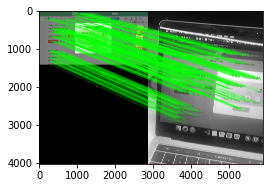

In [30]:
show(r)

In [33]:
k=0
str(k)

'0'

In [19]:
#视频补帧
im=cv2.imread('test/test.jpeg')
fps = 12 #视频每秒24帧
h,w,_=im.shape
size = (w, h) 
video = cv2.VideoWriter("test/test.avi", cv2.VideoWriter_fourcc('I', '4', '2', '0'),fps, size)
for i in range(fps):
    mat_translation=np.float32([[1,0,10],[0,1,10]])
    im=cv2.warpAffine(im,mat_translation,(w,h))
    video.write(im)
video.release()

In [27]:
model = hub.Module(name='video_restoration')
#model.predict('test/test.avi')
# model.predict('/Users/shadow/Documents/code/-PK-AI-mixlab-/server/test/test.avi')

[2021-03-12 10:43:33,183] [ WARNING] - The _initialize method in HubModule will soon be deprecated, you can use the __init__() to handle the initialization of the object
[2021-03-12 10:43:33,188] [ WARNING] - The _initialize method in HubModule will soon be deprecated, you can use the __init__() to handle the initialization of the object


TypeError: load_inference_model() missing 1 required positional argument: 'path_prefix'

In [10]:
mask_detector = hub.Module(name="pyramidbox_lite_server_mask")
result = mask_detector.face_detection(images=[cv2.imread('test/test.jpg')])

[2021-03-12 09:51:32,796] [ WARNING] - The _initialize method in HubModule will soon be deprecated, you can use the __init__() to handle the initialization of the object
[2021-03-12 09:51:32,892] [ WARNING] - The _initialize method in HubModule will soon be deprecated, you can use the __init__() to handle the initialization of the object


In [11]:
len(result[0]['data'])

0